In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split

import seaborn as sns

In [13]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/songs_test.csv',index_col=0)
df.columns

#https://stepik.org/media/attachments/course/4852/songs_test.csv
#https://stepik.org/media/attachments/course/4852/songs.csv

Index(['song', 'year', 'artist', 'genre', 'lyrics', 'length', 'commas',
       'exclamations', 'colons', 'hyphens'],
      dtype='object')

In [14]:
X = df[['commas','exclamations', 'colons', 'hyphens']]
y = df.artist
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [15]:
from sklearn.model_selection import cross_val_score

pr_score = pd.DataFrame()
for max_depth in range(1,25):
    clf = DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(X_train,y_train)
    predictions = clf.predict(X_test)
    precision_score_value = precision_score(predictions,y_test,average='micro')
    mean_cross_val_score = cross_val_score(clf,X,y, cv=5).mean()

    pr_score = pd.concat([pr_score,
              pd.DataFrame(
                  {'max_depth':[max_depth],
                   'precision':[precision_score_value],
                   'mean_cross_val_score':[mean_cross_val_score]}
              )])


In [16]:
scores_data_long = pd.melt(pr_score,
                           id_vars=['max_depth'],
                           value_vars=['precision',
                                       'mean_cross_val_score'
                                       ],
                           var_name='set_type',
                           value_name='score')

In [17]:
scores_data_long

,max_depth,set_type,score
0,1,precision,0.475000
1,2,precision,0.475000
2,3,precision,0.425000
3,4,precision,0.550000
4,5,precision,0.550000
5,6,precision,0.550000
6,7,precision,0.525000
7,8,precision,0.575000
8,9,precision,0.550000
9,10,precision,0.550000


<AxesSubplot:xlabel='max_depth', ylabel='score'>

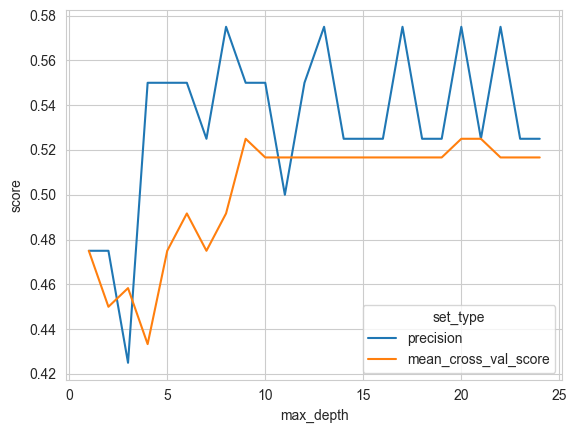

In [18]:
sns.lineplot(hue='set_type', data=scores_data_long,
             x='max_depth',
             y='score')

In [8]:
scores_data_long.score.idxmax()

10

In [9]:
scores_data_long[scores_data_long.max_depth==10]

,max_depth,set_type,score
9,10,precision,0.638655
33,10,mean_cross_val_score,0.650000
